In [1]:
import numpy as np 
from collections import Counter
import pandas as pd


In [10]:
from scipy.spatial.distance import cdist
from statistics import mode

In [3]:
data=pd.read_csv('haberman.data',header = None)

In [4]:
column=['Age','Year_of_Operation','No_of_positive_axillary','Survival_Status']
data.columns=column

In [5]:
X=data[data.columns[:-1]]
Y=data[data.columns[-1]]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as accuracy

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=10)

In [25]:
k_values = [1,2,3,4,5]
d = ['l1','l2']
accuracy_l1 = []
accuracy_l2 = []
#d = ['euclidean', 'manhattan']
for i in k_values:
  for j in d:
    count = 0
    l = len(x_test)
    knn = KNeighborsClassifier(n_neighbors = i,metric = j)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = accuracy(pred,y_test)
    if j == 'l1':
      accuracy_l1.append(acc)
    else:
      accuracy_l2.append(acc)

    print(f"k={i}, metric={j}  :  accuracy={acc}")
  print("\n")


k=1, metric=l1  :  accuracy=0.6935483870967742
k=1, metric=l2  :  accuracy=0.7258064516129032


k=2, metric=l1  :  accuracy=0.7096774193548387
k=2, metric=l2  :  accuracy=0.7258064516129032


k=3, metric=l1  :  accuracy=0.6935483870967742
k=3, metric=l2  :  accuracy=0.6612903225806451


k=4, metric=l1  :  accuracy=0.7096774193548387
k=4, metric=l2  :  accuracy=0.7096774193548387


k=5, metric=l1  :  accuracy=0.7419354838709677
k=5, metric=l2  :  accuracy=0.7096774193548387




In [28]:
k_values = [1,2,3,4,5]
d = ['l1','l2']
accuracy_l1 = []
accuracy_l2 = []
#d = ['euclidean', 'manhattan']
data_split = [0.8,0.6,0.7,0.9]
for s in data_split:
  print("for split: ", s*100,"-",100-s*100)
  x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=s,random_state=10)
  for i in k_values:
    for j in d:
      count = 0
      l = len(x_test)
      knn = KNeighborsClassifier(n_neighbors = i,metric = j)
      knn.fit(x_train,y_train)
      pred = knn.predict(x_test)
      acc = accuracy(pred,y_test)
      if j == 'l1':
        accuracy_l1.append(acc)
      else:
        accuracy_l2.append(acc)

      print(f"k={i}, metric={j}  :  accuracy={acc}")
    print("\n")


for split:  80.0 - 20.0
k=1, metric=l1  :  accuracy=0.6935483870967742
k=1, metric=l2  :  accuracy=0.7258064516129032


k=2, metric=l1  :  accuracy=0.7096774193548387
k=2, metric=l2  :  accuracy=0.7258064516129032


k=3, metric=l1  :  accuracy=0.6935483870967742
k=3, metric=l2  :  accuracy=0.6612903225806451


k=4, metric=l1  :  accuracy=0.7096774193548387
k=4, metric=l2  :  accuracy=0.7096774193548387


k=5, metric=l1  :  accuracy=0.7419354838709677
k=5, metric=l2  :  accuracy=0.7096774193548387


for split:  60.0 - 40.0
k=1, metric=l1  :  accuracy=0.7154471544715447
k=1, metric=l2  :  accuracy=0.6991869918699187


k=2, metric=l1  :  accuracy=0.7235772357723578
k=2, metric=l2  :  accuracy=0.7398373983739838


k=3, metric=l1  :  accuracy=0.7154471544715447
k=3, metric=l2  :  accuracy=0.7073170731707317


k=4, metric=l1  :  accuracy=0.7804878048780488
k=4, metric=l2  :  accuracy=0.7642276422764228


k=5, metric=l1  :  accuracy=0.7560975609756098
k=5, metric=l2  :  accuracy=0.77235772357

In [29]:
import matplotlib.pyplot as plt


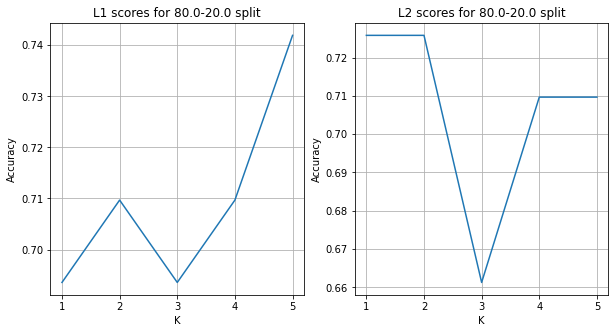

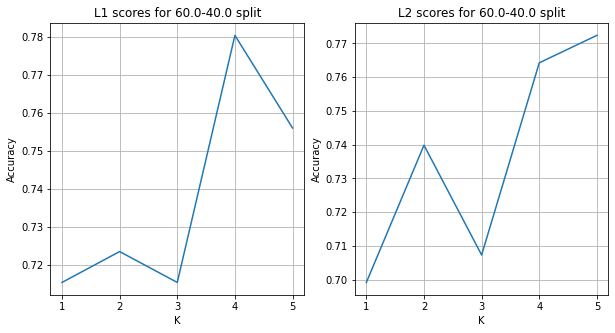

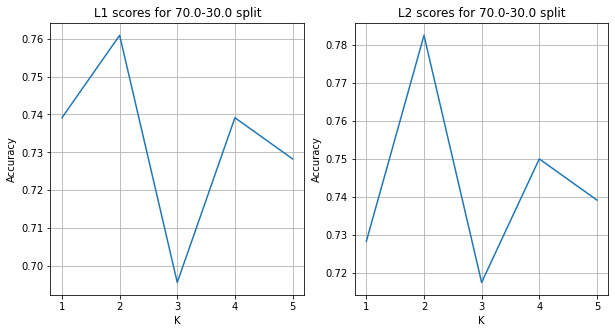

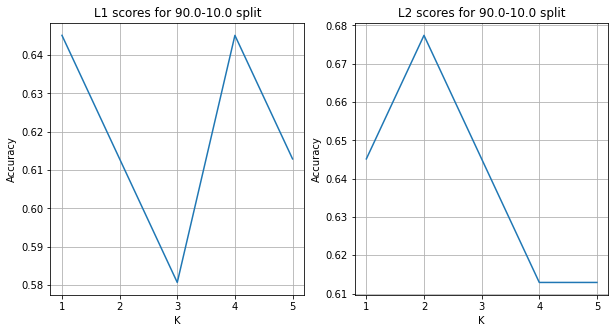

In [33]:
s_index = 0
e_index = 5
for s in data_split:
  fig,ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].plot(k_values,accuracy_l1[s_index:e_index])
  ax[0].set_title(f"L1 scores for {s*100}-{100-s*100} split")
  ax[0].set_xlabel('K')
  ax[0].set_ylabel('Accuracy')
  ax[0].grid()

  ax[1].plot(k_values,accuracy_l2[s_index:e_index])
  ax[1].set_title(f"L2 scores for {s*100}-{100-s*100} split")
  ax[1].set_xlabel('K')
  ax[1].set_ylabel('Accuracy')
  ax[1].grid()
  s_index += 5
  e_index += 5